# Lab 4 - part2
### Edge Detection

https://github.com/scikit-image/scikit-image/blob/master/skimage/filters/edges.py

http://scikit-image.org/docs/0.11.x/auto_examples/plot_edge_filter.html

http://scikit-image.org/docs/dev/auto_examples/edges/plot_canny.html



In [43]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [44]:
'''
1. Built-in Sobel, Prewill, Roberts, Canny
2. Custom Sobel (V-H-Both)
3. Custom LoG
'''
# img = rgb2gray(io.imread('circuit.tif'))
img = io.imread('circuit.tif')
# NOTE: image is already grayscale

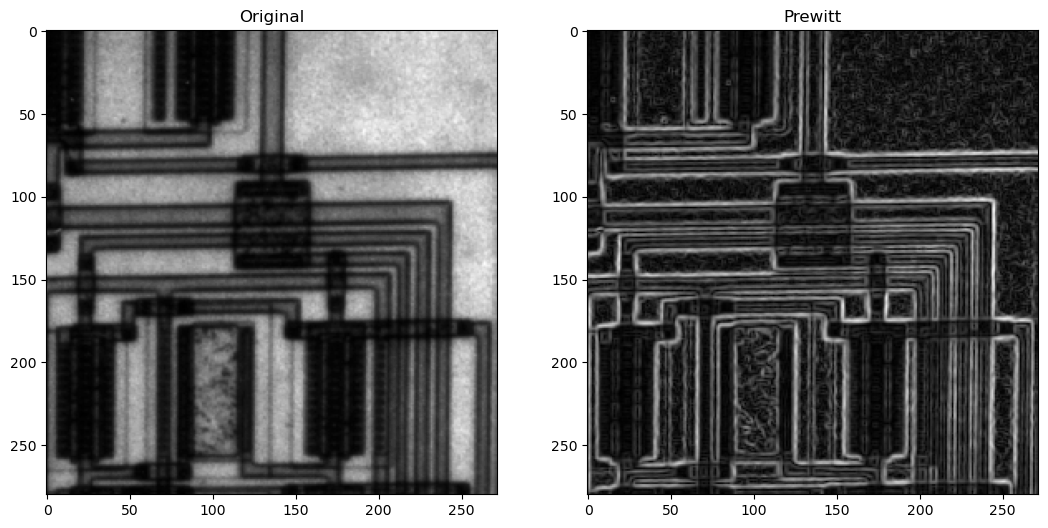

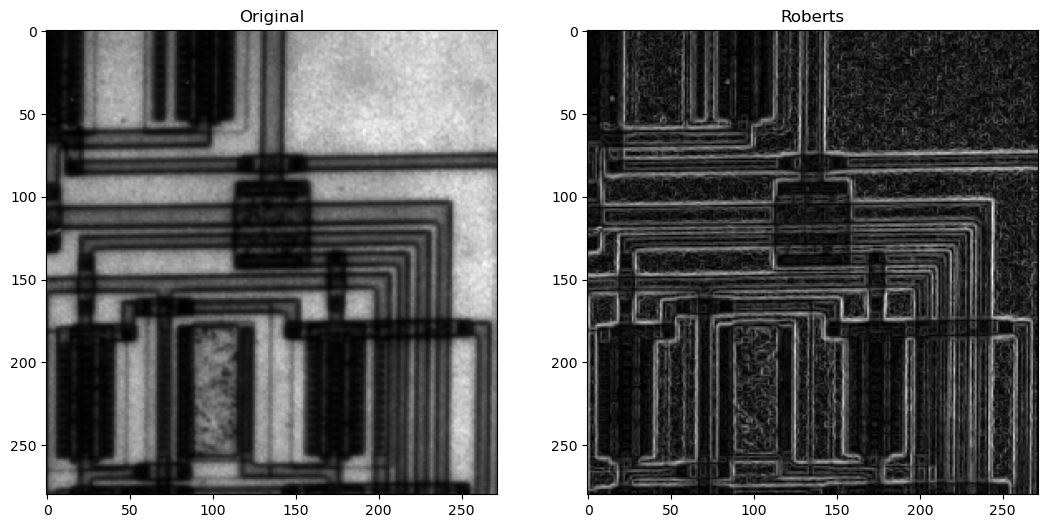

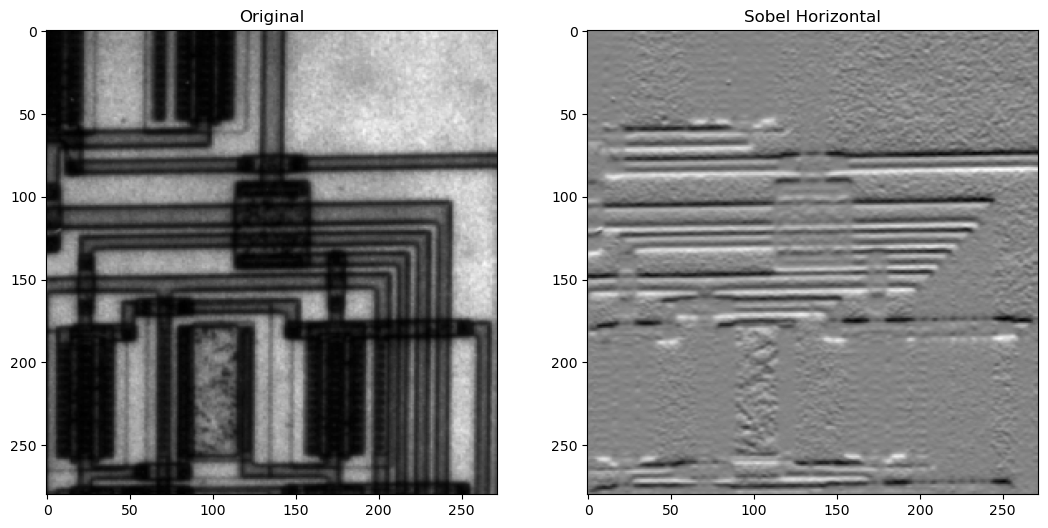

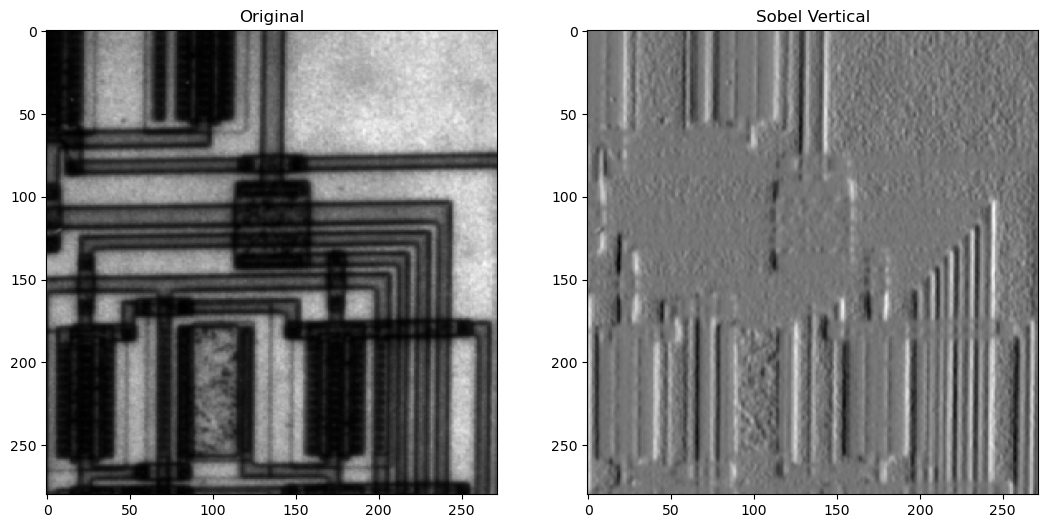

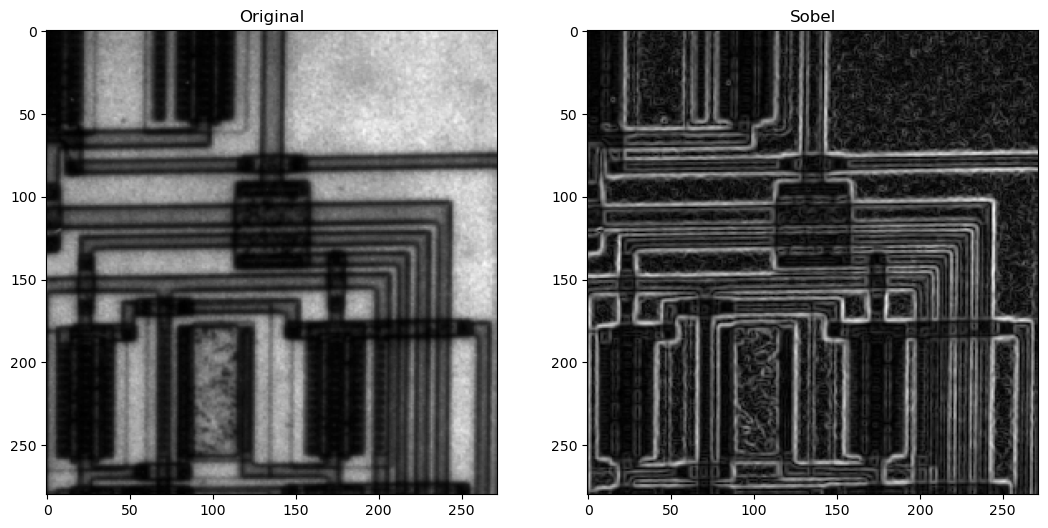

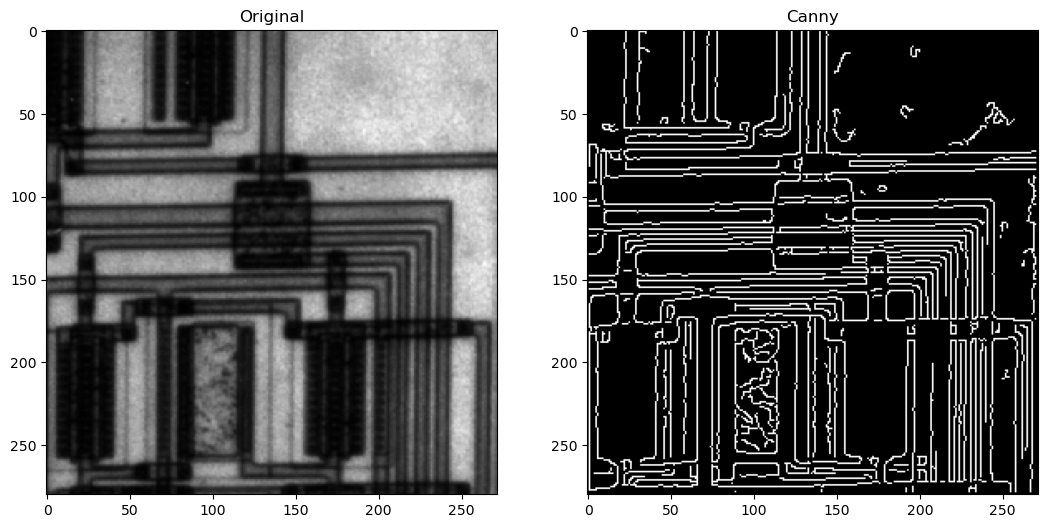

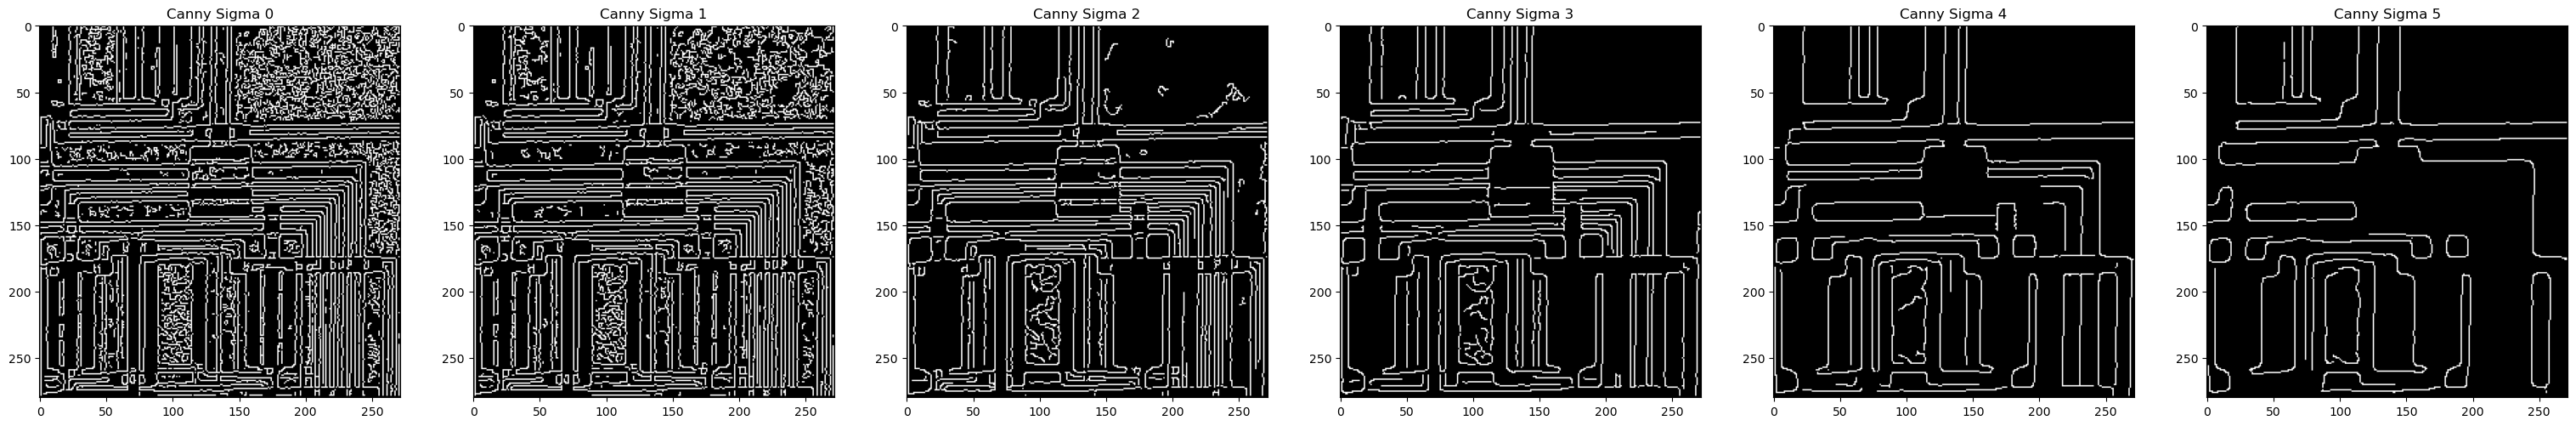

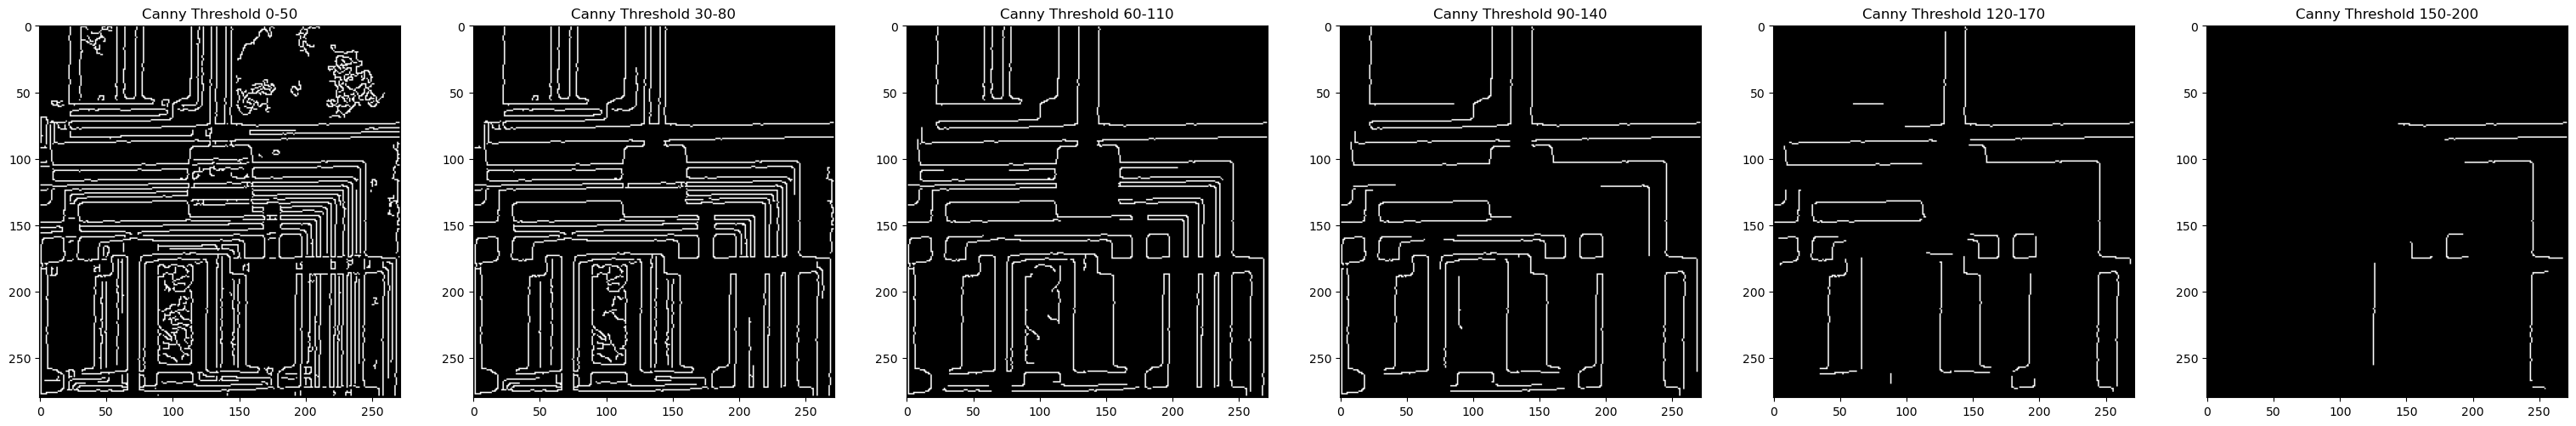

In [45]:
# 1. Built-in Sobel, Prewill, Roberts, Canny

prewitt_img = prewitt(img)
roberts_img = roberts(img)
sobel_h_img = sobel_h(img)
sobel_v_img = sobel_v(img)
sobel_img = sobel(img)
canny_img = canny(img)

show_images([img, prewitt_img], ['Original', 'Prewitt'])
show_images([img, roberts_img], ['Original', 'Roberts'])
show_images([img, sobel_h_img], ['Original', 'Sobel Horizontal'])
show_images([img, sobel_v_img], ['Original', 'Sobel Vertical'])
show_images([img, sobel_img], ['Original', 'Sobel'])
show_images([img, canny_img], ['Original', 'Canny'])


canny_sigma_images = [canny(
    img,
    sigma=0 + i * 0.5,
  ) for i in range(6)]

show_images(canny_sigma_images, ['Canny Sigma {}'.format(i) for i in range(6)])
# NOTE: effect of sigma in canny is to smooth the image before applying the edge detection
# NOTE: higher sigma means more smoothing + less noise + less edges detected
# NOTE: lower sigma means less smoothing + more noise + more edges detected

canny_threshold_images = [canny(
    img,
    low_threshold=0 + i * 30,
    high_threshold=50 + i * 30,
  ) for i in range(6)]

show_images(canny_threshold_images, ['Canny Threshold {}-{}'.format(0 + i * 30, 50 + i * 30) for i in range(6)])
# NOTE: effect of threshold in canny is to filter out edges that are not in the correct range

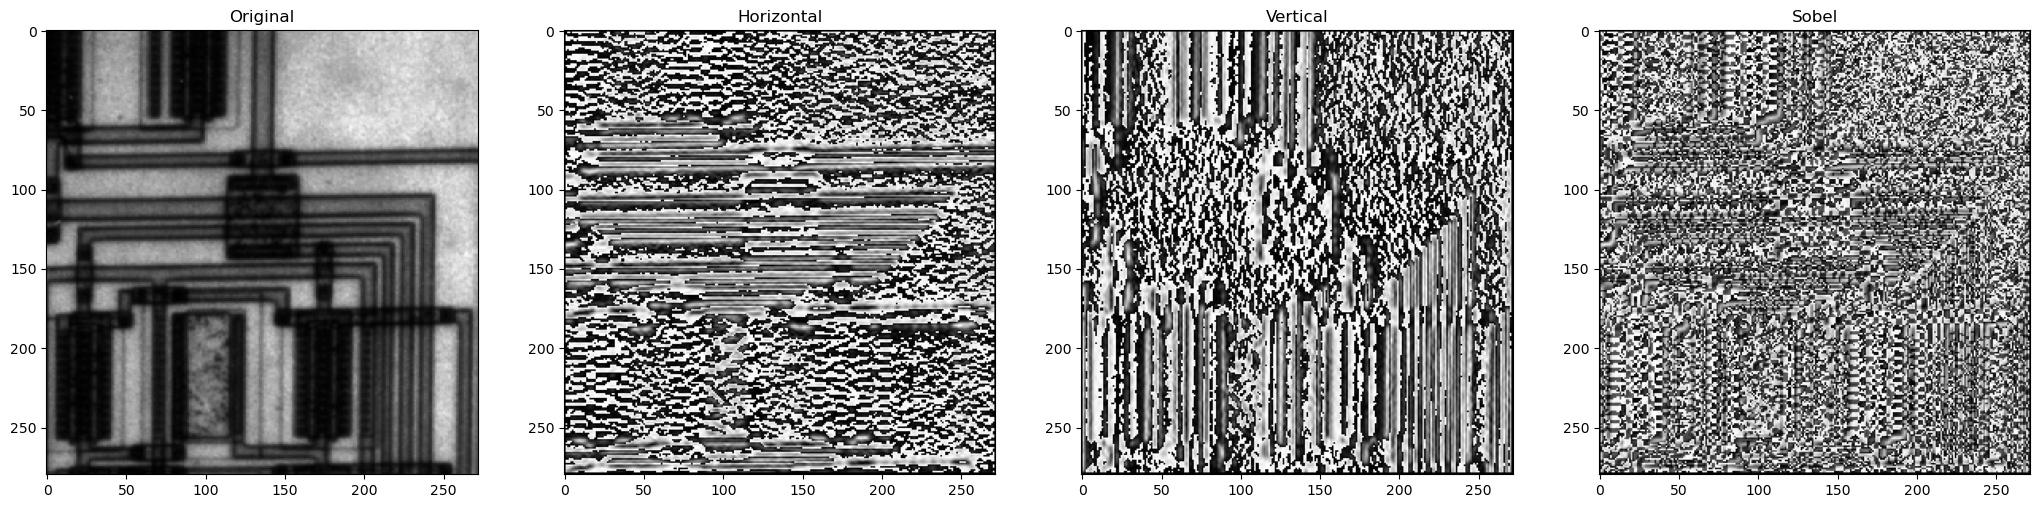

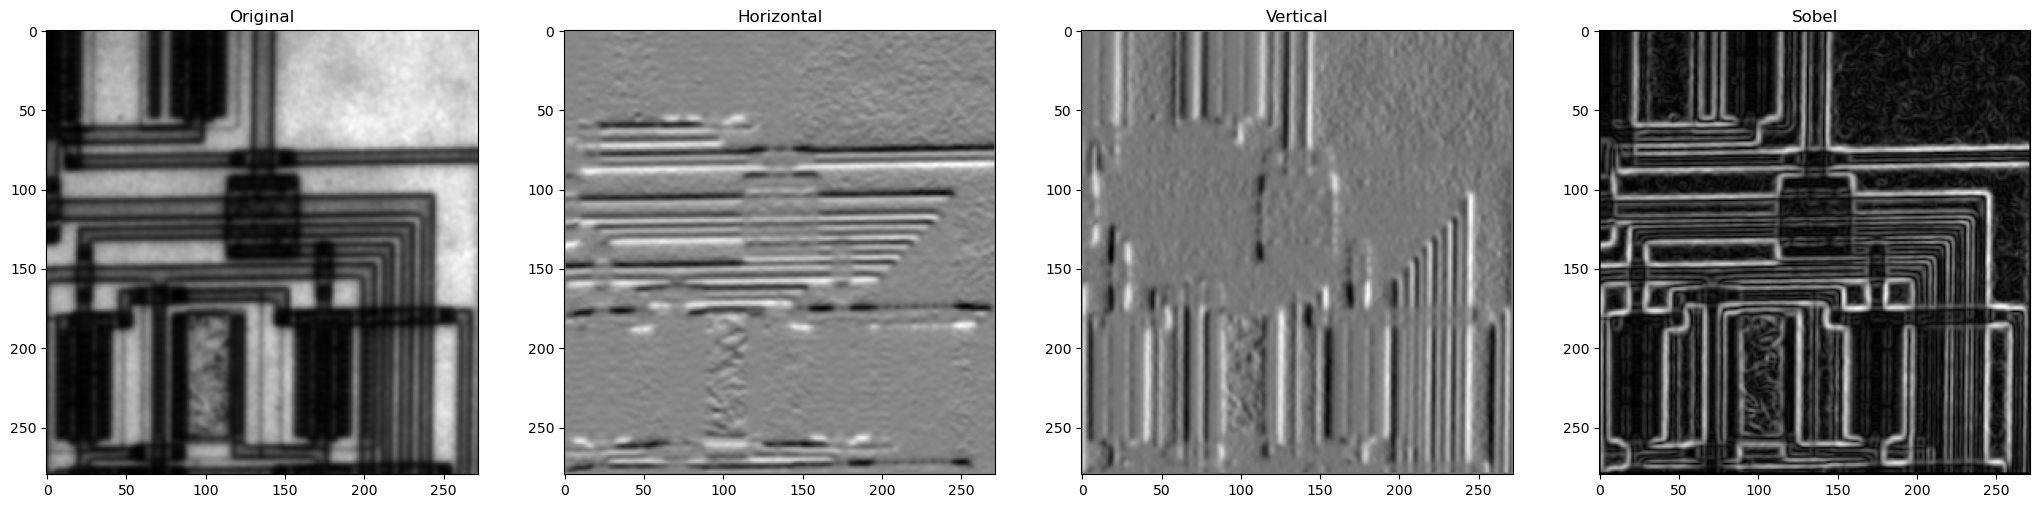

In [46]:
# 2. Custom Sobel (V-H-Both)

def custom_sobel(img, threshold=0):
  H_X_FILTER = np.array([
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1],
  ])
  H_Y_FILTER = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1],
  ])
  img_h_x = np.zeros_like(img)
  img_h_y = np.zeros_like(img)
  img_sobel = np.zeros_like(img)
  
  for i in range(1, img.shape[0] - 1):
    for j in range(1, img.shape[1] - 1):
      img_h_x[i, j] = np.sum(H_X_FILTER * img[i-1:i+2, j-1:j+2])
      img_h_y[i, j] = np.sum(H_Y_FILTER * img[i-1:i+2, j-1:j+2])
      
      img_sobel[i, j] = np.sqrt(img_h_x[i, j] ** 2 + img_h_y[i, j] ** 2)
      
  img_sobel[img_sobel < threshold] = 0

  show_images([img, img_h_x, img_h_y, img_sobel], ['Original', 'Horizontal', 'Vertical', 'Sobel'])
      
  
custom_sobel(img, threshold=0)
# NOTE: this means than skimage sobel is applying gaussian filter before applying the sobel filter
custom_sobel(gaussian(img, sigma=1), threshold=0)


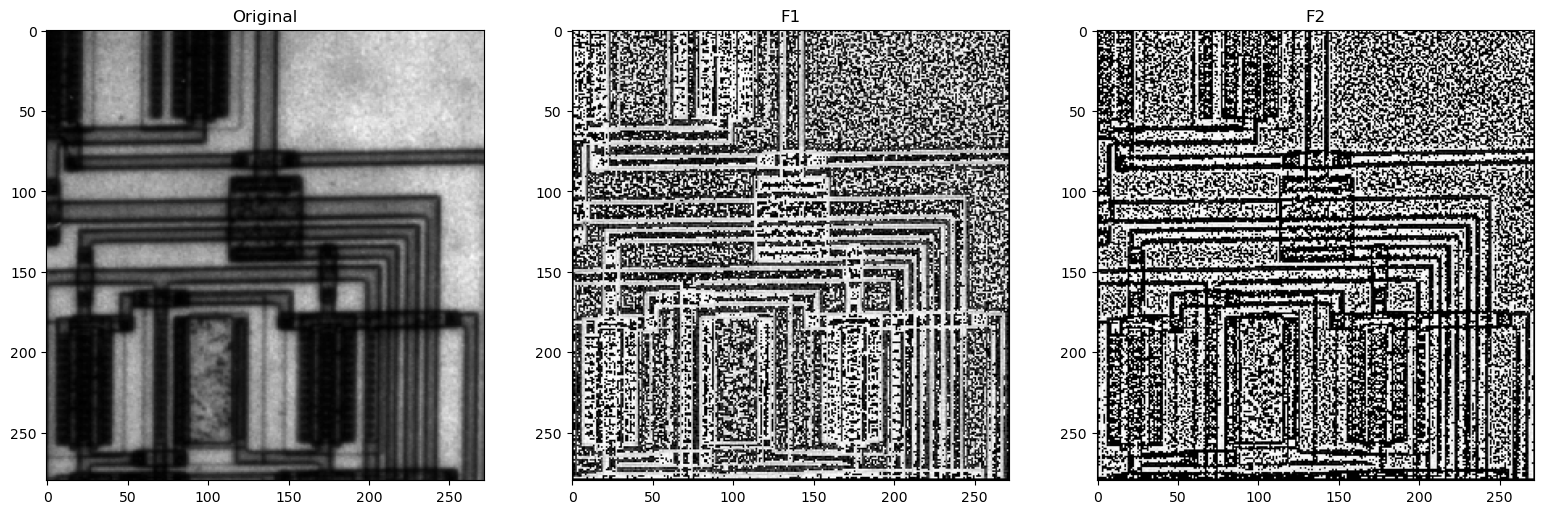

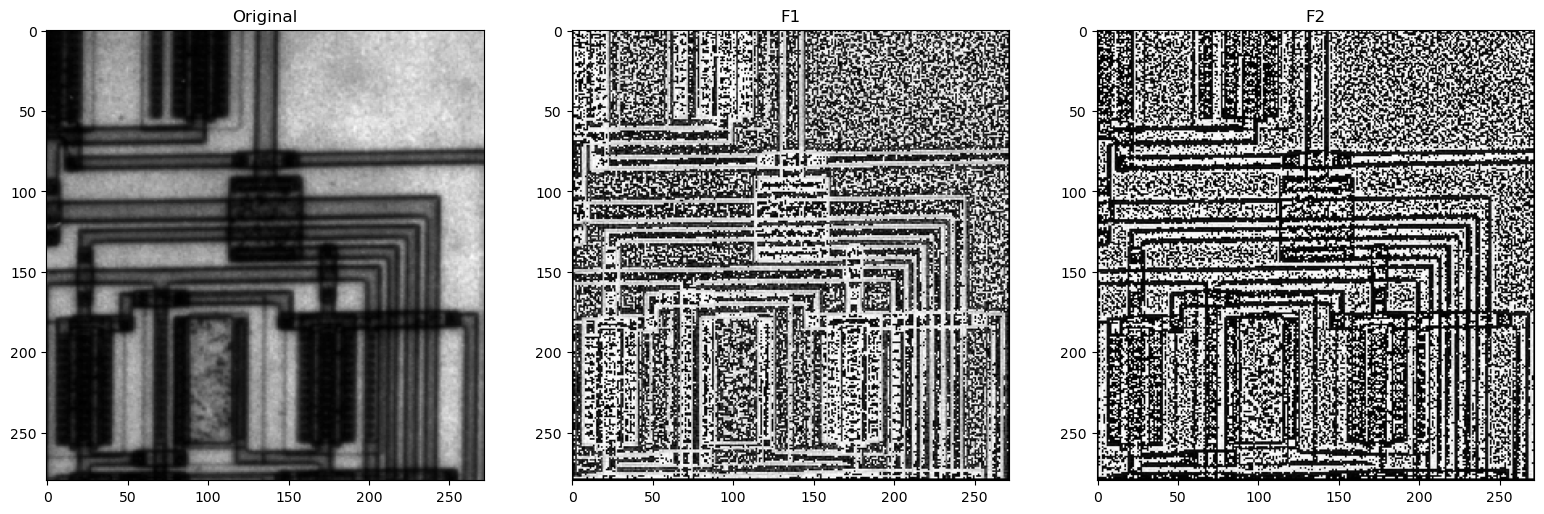

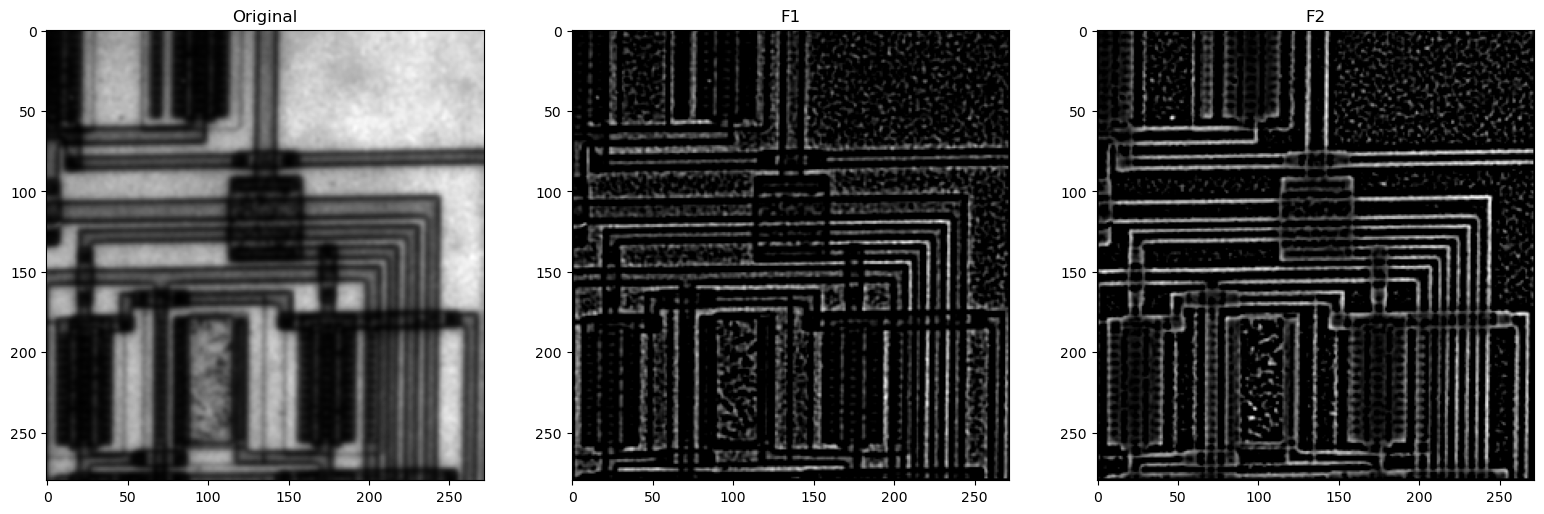

In [61]:
# 3. Custom LoG
THRESH= 20

def custom_LoG(img, threshold=0):
  F1_FILTER = np.array([
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1],
  ])
  F2_FILTER = np.array([
    [0, 1, 0],
    [1, -4, 1],
    [0, 1, 0],
  ])
  
  img_f1 = np.zeros_like(img)
  img_f2 = np.zeros_like(img)
  
  for i in range(1, img.shape[0] - 1):
    for j in range(1, img.shape[1] - 1):
      img_f1[i, j] = np.sum(F1_FILTER * img[i-1:i+2, j-1:j+2])
      img_f2[i, j] = np.sum(F2_FILTER * img[i-1:i+2, j-1:j+2])
      
  img_f1[img_f1 < threshold] = 0
  img_f2[img_f2 < threshold] = 0
  
  show_images([img, img_f1, img_f2], ['Original', 'F1', 'F2'])
  
custom_LoG(img, threshold=THRESH)
custom_LoG(img, threshold=0)

custom_LoG(gaussian(img, sigma=1), threshold=0)




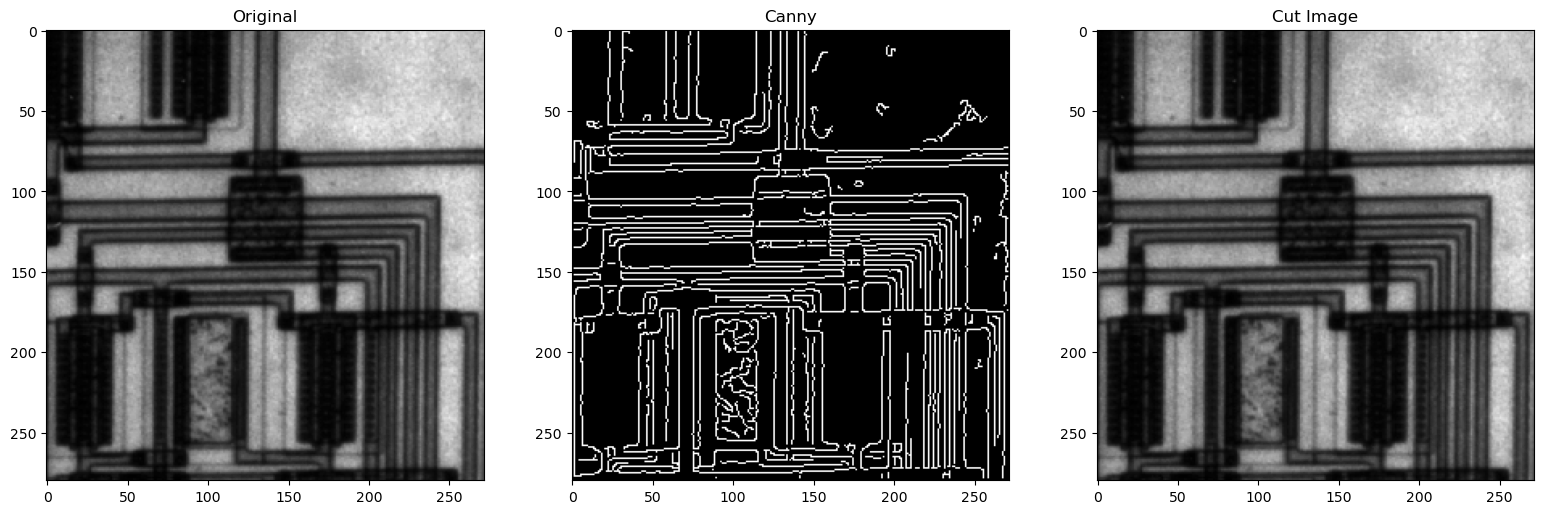

In [48]:
'''
Optional
1-Make edge detection
2-Multiply by factor < 1
3-Subtract (Orginal Image) - (Edge Detection Image)
'''

canny_img = canny(img)
canny_img = canny_img * 0.5
cut_image = img - canny_img
show_images([img, canny_img, cut_image], ['Original', 'Canny', 'Cut Image'])
# NOTE: this is a way to make edges become black (maybe it's considered removing them)